# HiGHS HIPO Analysis

Analysis of HiGHS HIPO preliminary results comparing different HiGHS variants.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

## Load Results

In [2]:
# Load HiGHS HIPO preliminary results
results_file = 'infrastructure/benchmarks/runtime_optimized/highs_hipo_prelim_results.csv'
results = pd.read_csv(results_file)

print(f"Loaded {len(results)} results")
print(f"\nColumns: {list(results.columns)}")
print(f"\nUnique solvers: {results['Solver'].unique()}")
print(f"\nUnique benchmarks: {results['Benchmark'].unique()}")

Loaded 20 results

Columns: ['Benchmark', 'Size', 'Solver', 'Solver Version', 'Solver Release Year', 'Status', 'Termination Condition', 'Runtime (s)', 'Memory Usage (MB)', 'Objective Value', 'Max Integrality Violation', 'Duality Gap', 'Reported Runtime (s)', 'Timeout', 'Hostname', 'Run ID', 'Timestamp']

Unique solvers: ['highs' 'highs-binary' 'highs-hipo' 'highs-hipo-ipm' 'highs-hipo-32'
 'highs-hipo-64']

Unique benchmarks: ['pypsa-eur-elec-op-ucconv' 'reference-benchmark'
 'Sienna_modified_RTS_GMLC_DA_sys_NetDC_Horizon24_Day332'
 'pypsa-eur-elec-op']


In [3]:
# Display first few rows
results.head(10)

,Benchmark,Size,Solver,Solver Version,Solver Release Year,Status,Termination Condition,Runtime (s),Memory Usage (MB),Objective Value,Max Integrality Violation,Duality Gap,Reported Runtime (s),Timeout,Hostname,Run ID,Timestamp
0,pypsa-eur-elec-op-ucconv,2-3h,highs,1.10.0,2025.0,ok,optimal,2620.056336,4714.304,1.076516e+10,0.000000e+00,0.0001,2618.165364,3600.0,benchmark-instance-highs-prelim-test-00,20251010_185424_benchmark-instance-highs-preli...,2025-10-10 18:58:29.409855
1,reference-benchmark,reference,highs-binary,1.10.0,NaN,OK,Optimal,181.042067,NaN,2.813304e+09,NaN,NaN,NaN,NaN,benchmark-instance-highs-prelim-test-00,20251010_185424_benchmark-instance-highs-preli...,2025-10-10 19:45:13.222175
2,pypsa-eur-elec-op-ucconv,2-3h,highs-hipo,1.11.0-hipo,2025.0,ok,Optimal,1499.887785,2471.208,1.076517e+10,NaN,NaN,1499.887785,3600.0,benchmark-instance-highs-prelim-test-00,20251010_185424_benchmark-instance-highs-preli...,2025-10-10 19:45:13.222303
3,pypsa-eur-elec-op-ucconv,2-3h,highs-hipo-ipm,1.11.0-hipo,2025.0,ok,Optimal,1498.668607,2470.088,1.076517e+10,NaN,NaN,1498.668607,3600.0,benchmark-instance-highs-prelim-test-00,20251010_185424_benchmark-instance-highs-preli...,2025-10-10 20:10:13.831061
4,pypsa-eur-elec-op-ucconv,2-3h,highs-hipo-32,1.11.0-hipo,2025.0,ok,Optimal,1500.080767,2465.348,1.076517e+10,NaN,NaN,1500.080767,3600.0,benchmark-instance-highs-prelim-test-00,20251010_185424_benchmark-instance-highs-preli...,2025-10-10 20:35:12.912126
5,reference-benchmark,reference,highs-binary,1.10.0,NaN,OK,Optimal,180.758704,NaN,2.813304e+09,NaN,NaN,NaN,NaN,benchmark-instance-highs-prelim-test-00,20251010_185424_benchmark-instance-highs-preli...,2025-10-10 21:03:14.163928
6,pypsa-eur-elec-op-ucconv,2-3h,highs-hipo-64,1.11.0-hipo,2025.0,ok,Optimal,1495.810838,2466.464,1.076517e+10,NaN,NaN,1495.810838,3600.0,benchmark-instance-highs-prelim-test-00,20251010_185424_benchmark-instance-highs-preli...,2025-10-10 21:03:14.164049
7,Sienna_modified_RTS_GMLC_DA_sys_NetDC_Horizon2...,1-1h,highs,1.10.0,2025.0,ok,optimal,3022.784890,1021.224,8.922978e+05,1.865175e-14,0.0001,3022.573616,3600.0,benchmark-instance-highs-prelim-test-01,20251010_185429_benchmark-instance-highs-preli...,2025-10-10 18:59:42.273848
8,reference-benchmark,reference,highs-binary,1.10.0,NaN,OK,Optimal,232.219908,NaN,2.813304e+09,NaN,NaN,NaN,NaN,benchmark-instance-highs-prelim-test-01,20251010_185429_benchmark-instance-highs-preli...,2025-10-10 19:53:58.008965
9,Sienna_modified_RTS_GMLC_DA_sys_NetDC_Horizon2...,1-1h,highs-hipo,1.11.0-hipo,2025.0,ok,Optimal,1441.530234,896.220,8.922978e+05,NaN,NaN,1441.530234,3600.0,benchmark-instance-highs-prelim-test-01,20251010_185429_benchmark-instance-highs-preli...,2025-10-10 19:53:58.009106


## Data Preparation

In [4]:
# Create benchmark-size identifier
results['bench-size'] = results['Benchmark'] + '-' + results['Size']

# Filter out reference benchmarks for main analysis
actual_results = results[results['Benchmark'] != 'reference-benchmark'].copy()

print(f"\nActual benchmark results: {len(actual_results)}")
print(f"Reference benchmark results: {len(results) - len(actual_results)}")


Actual benchmark results: 15
Reference benchmark results: 5


## Performance Comparison

In [5]:
# Group by benchmark and solver, showing runtime statistics
perf_summary = actual_results.groupby(['bench-size', 'Solver']).agg({
    'Runtime (s)': ['mean', 'std', 'min', 'max', 'count'],
    'Memory Usage (MB)': 'mean',
    'Status': lambda x: (x == 'ok').sum()
}).round(2)

perf_summary.columns = ['_'.join(col).strip() for col in perf_summary.columns.values]
perf_summary = perf_summary.rename(columns={'Status_<lambda>': 'Success_count'})
print(perf_summary)

                                                                   Runtime (s)_mean  \
bench-size                                         Solver                             
Sienna_modified_RTS_GMLC_DA_sys_NetDC_Horizon24... highs                    3022.78   
                                                   highs-hipo               1441.53   
                                                   highs-hipo-32            1429.22   
                                                   highs-hipo-64            1439.92   
                                                   highs-hipo-ipm           1419.04   
pypsa-eur-elec-op-4-3h                             highs                    2661.70   
                                                   highs-hipo                 91.83   
                                                   highs-hipo-32              77.43   
                                                   highs-hipo-64              75.90   
                                           

## Runtime Comparison Plots

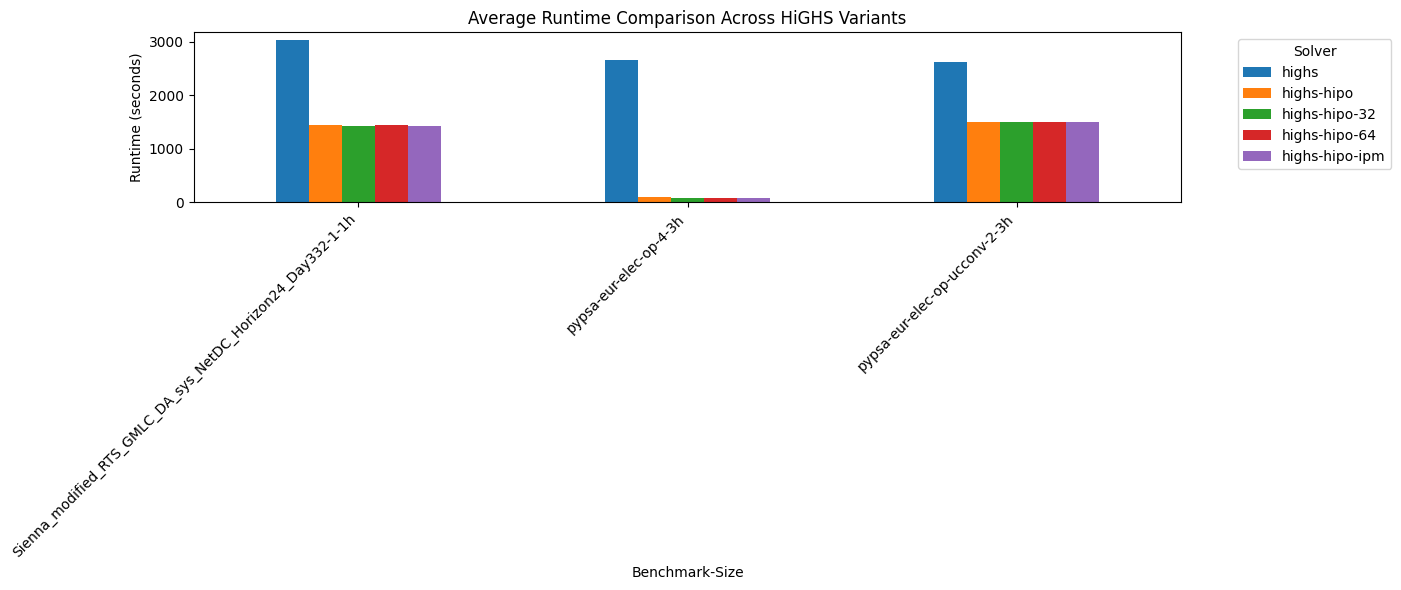

In [6]:
# Bar chart comparing average runtimes across solvers for each benchmark
pivot_runtime = actual_results.pivot_table(
    index='bench-size',
    columns='Solver',
    values='Runtime (s)',
    aggfunc='mean'
)

fig, ax = plt.subplots(figsize=(14, 6))
pivot_runtime.plot(kind='bar', ax=ax)
ax.set_ylabel('Runtime (seconds)')
ax.set_xlabel('Benchmark-Size')
ax.set_title('Average Runtime Comparison Across HiGHS Variants')
ax.legend(title='Solver', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

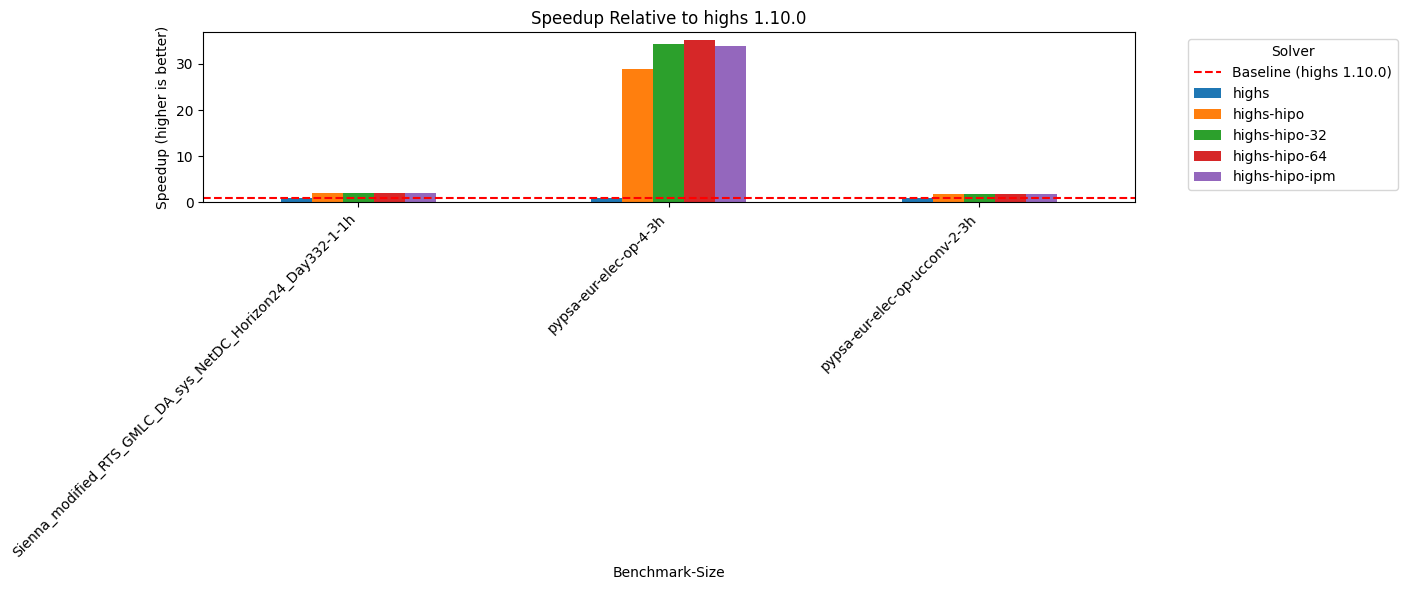

In [7]:
# Speedup comparison: normalize to baseline highs 1.10.0
baseline_solver = 'highs'

# Get baseline runtimes
baseline_runtimes = actual_results[actual_results['Solver'] == baseline_solver].groupby('bench-size')['Runtime (s)'].mean()

# Calculate speedups
speedup_data = []
for bench in actual_results['bench-size'].unique():
    if bench not in baseline_runtimes.index:
        continue
    baseline = baseline_runtimes[bench]

    for solver in actual_results['Solver'].unique():
        solver_results = actual_results[
            (actual_results['bench-size'] == bench) &
            (actual_results['Solver'] == solver)
        ]
        if len(solver_results) > 0:
            avg_runtime = solver_results['Runtime (s)'].mean()
            speedup = baseline / avg_runtime
            speedup_data.append({
                'Benchmark': bench,
                'Solver': solver,
                'Speedup': speedup
            })

speedup_df = pd.DataFrame(speedup_data)

# Plot speedups
pivot_speedup = speedup_df.pivot(index='Benchmark', columns='Solver', values='Speedup')

fig, ax = plt.subplots(figsize=(14, 6))
pivot_speedup.plot(kind='bar', ax=ax)
ax.axhline(y=1.0, color='red', linestyle='--', label='Baseline (highs 1.10.0)')
ax.set_ylabel('Speedup (higher is better)')
ax.set_xlabel('Benchmark-Size')
ax.set_title(f'Speedup Relative to {baseline_solver} 1.10.0')
ax.legend(title='Solver', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Memory Usage Comparison

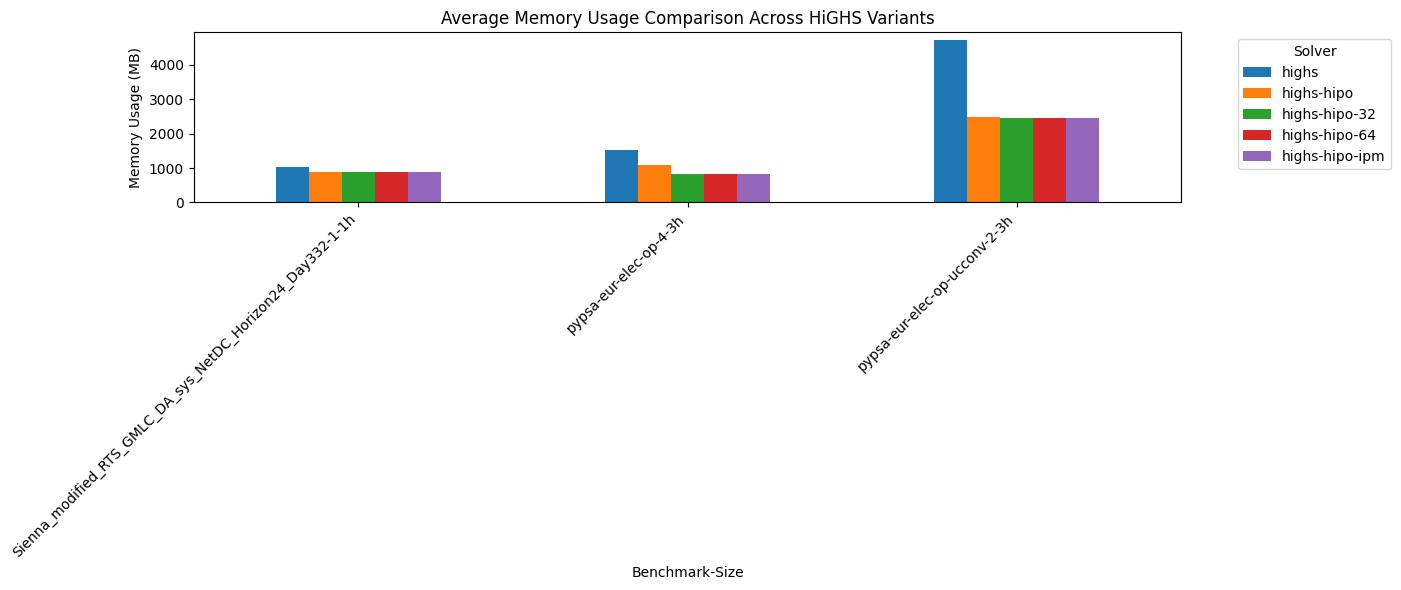

In [8]:
# Memory usage comparison
pivot_memory = actual_results.pivot_table(
    index='bench-size',
    columns='Solver',
    values='Memory Usage (MB)',
    aggfunc='mean'
)

fig, ax = plt.subplots(figsize=(14, 6))
pivot_memory.plot(kind='bar', ax=ax)
ax.set_ylabel('Memory Usage (MB)')
ax.set_xlabel('Benchmark-Size')
ax.set_title('Average Memory Usage Comparison Across HiGHS Variants')
ax.legend(title='Solver', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Result Validation and Quality Checks

In [ ]:
# Check if reported and measured runtimes are similar
print("Reported vs Measured Runtime Comparison:\n")

runtime_comp = actual_results[
    (actual_results['Status'] == 'ok') &
    (~actual_results['Reported Runtime (s)'].isna())
].copy()

if len(runtime_comp) > 0:
    runtime_comp['Runtime Diff'] = (runtime_comp['Runtime (s)'] - runtime_comp['Reported Runtime (s)']).abs()
    runtime_comp['Runtime Diff %'] = (runtime_comp['Runtime Diff'] / runtime_comp['Reported Runtime (s)']) * 100

    print(f"Results with reported runtime: {len(runtime_comp)}")
    print(f"\nRuntime difference statistics:")
    print(runtime_comp['Runtime Diff %'].describe())

    # Show largest differences
    print(f"\nTop 5 largest runtime differences:")
    top_diffs = runtime_comp.nlargest(5, 'Runtime Diff %')[
        ['bench-size', 'Solver', 'Runtime (s)', 'Reported Runtime (s)', 'Runtime Diff %']
    ]
    print(top_diffs.to_string(index=False))

    # Check if any have >5% difference
    high_diff = runtime_comp[runtime_comp['Runtime Diff %'] > 5.0]
    if len(high_diff) > 0:
        print(f"\n⚠ WARNING: {len(high_diff)} results with >5% difference between measured and reported runtime")
    else:
        print("\n✓ All runtime measurements are consistent (<5% difference)")
else:
    print("No reported runtime data available for comparison")

Reported vs Measured Runtime Comparison:

Results with reported runtime: 15

Runtime difference statistics:
count    15.000000
mean      0.014858
std       0.040169
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       0.143652
Name: Runtime Diff %, dtype: float64

Top 5 largest runtime differences:
                                                 bench-size         Solver  Runtime (s)  Reported Runtime (s)  Runtime Diff %
                                     pypsa-eur-elec-op-4-3h          highs  2661.703448           2657.885345        0.143652
                              pypsa-eur-elec-op-ucconv-2-3h          highs  2620.056336           2618.165364        0.072225
Sienna_modified_RTS_GMLC_DA_sys_NetDC_Horizon24_Day332-1-1h          highs  3022.784890           3022.573616        0.006990
                              pypsa-eur-elec-op-ucconv-2-3h     highs-hipo  1499.887785           1499.887785        0.000000
                              pypsa-e

In [ ]:
# Check for high maximum integrality violations
print("Integrality Violation Analysis:\n")

integrality_data = actual_results[~actual_results['Max Integrality Violation'].isna()].copy()
if len(integrality_data) > 0:
    print(f"Results with integrality violation data: {len(integrality_data)}")
    print(f"\nIntegrality violation statistics:")
    print(integrality_data['Max Integrality Violation'].describe())

    high_violation = integrality_data[integrality_data['Max Integrality Violation'] > 1e-6]
    if len(high_violation) > 0:
        print(f"\n⚠ WARNING: {len(high_violation)} results with max integrality violation > 1e-6:")
        print(high_violation[['bench-size', 'Solver', 'Max Integrality Violation']].sort_values('Max Integrality Violation', ascending=False))
    else:
        print("\n✓ All integrality violations are within acceptable range (< 1e-6)")
else:
    print("No integrality violation data available")

Integrality Violation Analysis:

Results with integrality violation data: 2

Integrality violation statistics:
count    2.000000e+00
mean     9.325873e-15
std      1.318878e-14
min      0.000000e+00
25%      4.662937e-15
50%      9.325873e-15
75%      1.398881e-14
max      1.865175e-14
Name: Max Integrality Violation, dtype: float64

✓ All integrality violations are within acceptable range (< 1e-6)


In [ ]:
# Check for high duality gaps (above 1e-4)
print("Duality Gap Analysis:\n")

duality_gap_data = actual_results[~actual_results['Duality Gap'].isna()].copy()
if len(duality_gap_data) > 0:
    print(f"Results with duality gap data: {len(duality_gap_data)}")
    print(f"\nDuality gap statistics:")
    print(duality_gap_data['Duality Gap'].describe())

    high_gap = duality_gap_data[duality_gap_data['Duality Gap'] > 1e-4]
    if len(high_gap) > 0:
        print(f"\n⚠ WARNING: {len(high_gap)} results with duality gap > 1e-4:")
        print(high_gap[['bench-size', 'Solver', 'Duality Gap']].sort_values('Duality Gap', ascending=False))
    else:
        print("\n✓ All duality gaps are within acceptable range (< 1e-4)")
else:
    print("No duality gap data available")

Duality Gap Analysis:

Results with duality gap data: 2

Duality gap statistics:
count    2.000000e+00
mean     9.977857e-05
std      3.055426e-07
min      9.956252e-05
25%      9.967054e-05
50%      9.977857e-05
75%      9.988659e-05
max      9.999462e-05
Name: Duality Gap, dtype: float64

✓ All duality gaps are within acceptable range (< 1e-4)


In [ ]:
# Check that all solvers report similar objective values for the same benchmark
print("Objective Value Consistency Check:\n")

for bench in actual_results['bench-size'].unique():
    bench_data = actual_results[
        (actual_results['bench-size'] == bench) &
        (~actual_results['Objective Value'].isna())
    ]

    if len(bench_data) > 0:
        obj_values = bench_data['Objective Value']
        obj_min = obj_values.min()
        obj_max = obj_values.max()
        obj_std = obj_values.std()
        obj_std_ratio = obj_std / obj_min if obj_min != 0 else 0

        print(f"\n{bench}:")
        print(f"  Min: {obj_min:.6e}, Max: {obj_max:.6e}")
        print(f"  Std Dev: {obj_std:.6e}, Std/Min ratio: {obj_std_ratio:.6e}")

        if obj_std_ratio > 1e-4:
            print(f"  ⚠ WARNING: High variation in objective values!")
            print(bench_data[['Solver', 'Objective Value']])
        else:
            print(f"  ✓ Good agreement (std/min < 1e-4)")

Objective Value Consistency Check:


pypsa-eur-elec-op-ucconv-2-3h:
  Min: 1.076516e+10, Max: 1.076517e+10
  Std Dev: 1.660261e+03, Std/Min ratio: 1.542253e-07
  ✓ Good agreement (std/min < 1e-4)

Sienna_modified_RTS_GMLC_DA_sys_NetDC_Horizon24_Day332-1-1h:
  Min: 8.922978e+05, Max: 8.922978e+05
  Std Dev: 1.126529e-06, Std/Min ratio: 1.262503e-12
  ✓ Good agreement (std/min < 1e-4)

pypsa-eur-elec-op-4-3h:
  Min: 8.630161e+09, Max: 8.630161e+09
  Std Dev: 2.006395e+00, Std/Min ratio: 2.324864e-10
  ✓ Good agreement (std/min < 1e-4)


## Detailed Benchmark-by-Benchmark Comparison

In [13]:
# For each benchmark, show detailed comparison
for bench in actual_results['bench-size'].unique():
    bench_data = actual_results[actual_results['bench-size'] == bench]

    print(f"\n{'='*80}")
    print(f"Benchmark: {bench}")
    print(f"{'='*80}")

    summary = bench_data.groupby('Solver').agg({
        'Runtime (s)': ['mean', 'std'],
        'Memory Usage (MB)': 'mean',
        'Status': lambda x: list(x)
    }).round(2)

    print(summary)
    print()


Benchmark: pypsa-eur-elec-op-ucconv-2-3h
               Runtime (s)     Memory Usage (MB)   Status
                      mean std              mean <lambda>
Solver                                                   
highs              2620.06 NaN           4714.30     [ok]
highs-hipo         1499.89 NaN           2471.21     [ok]
highs-hipo-32      1500.08 NaN           2465.35     [ok]
highs-hipo-64      1495.81 NaN           2466.46     [ok]
highs-hipo-ipm     1498.67 NaN           2470.09     [ok]


Benchmark: Sienna_modified_RTS_GMLC_DA_sys_NetDC_Horizon24_Day332-1-1h
               Runtime (s)     Memory Usage (MB)   Status
                      mean std              mean <lambda>
Solver                                                   
highs              3022.78 NaN           1021.22     [ok]
highs-hipo         1441.53 NaN            896.22     [ok]
highs-hipo-32      1429.22 NaN            880.93     [ok]
highs-hipo-64      1439.92 NaN            880.41     [ok]
highs-hipo-ipm 

## Reference Benchmark Analysis

Reference benchmark runs: 5

Runtime statistics:
count      5.000000
mean     198.627852
std       24.101481
min      180.758704
25%      181.042067
50%      182.754563
75%      216.364019
max      232.219908
Name: Runtime (s), dtype: float64


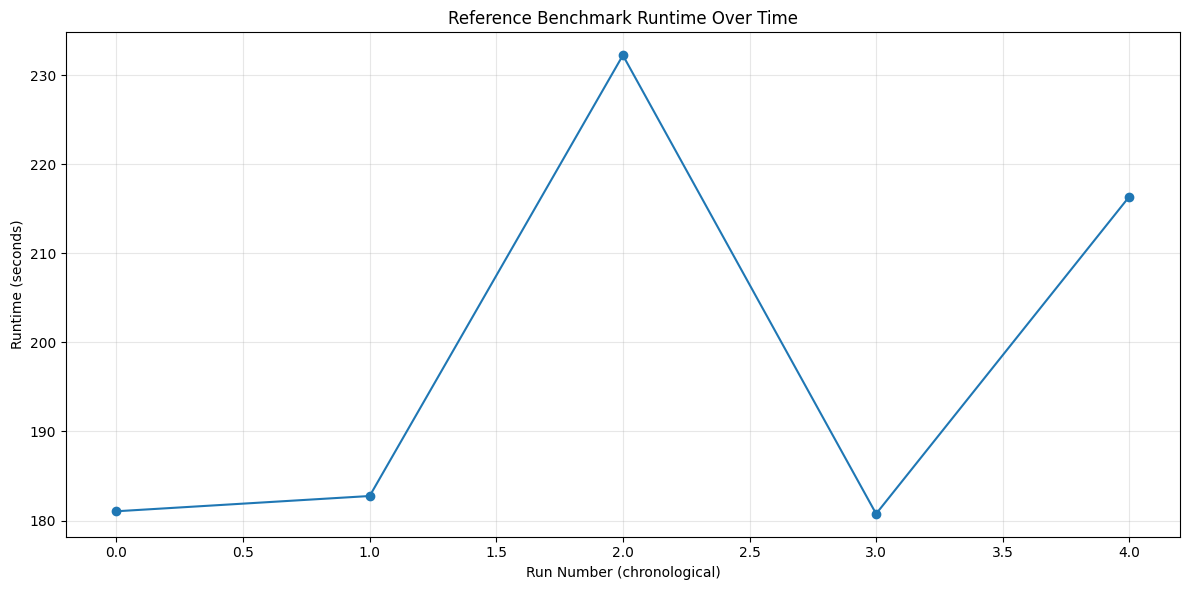

In [14]:
# Analyze reference benchmark runs to check consistency
reference_results = results[results['Benchmark'] == 'reference-benchmark'].copy()

if len(reference_results) > 0:
    print(f"Reference benchmark runs: {len(reference_results)}")
    print(f"\nRuntime statistics:")
    print(reference_results['Runtime (s)'].describe())

    # Plot reference benchmark runtimes over time
    fig, ax = plt.subplots(figsize=(12, 6))
    reference_results_sorted = reference_results.sort_values('Timestamp')
    ax.plot(range(len(reference_results_sorted)), reference_results_sorted['Runtime (s)'], 'o-')
    ax.set_xlabel('Run Number (chronological)')
    ax.set_ylabel('Runtime (seconds)')
    ax.set_title('Reference Benchmark Runtime Over Time')
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("No reference benchmark results found.")

## Summary Statistics

In [15]:
# Overall summary by solver
overall_summary = actual_results.groupby('Solver').agg({
    'Runtime (s)': ['mean', 'median', 'std'],
    'Memory Usage (MB)': ['mean', 'median'],
    'Status': lambda x: f"{(x == 'ok').sum()}/{len(x)}"
}).round(2)

print("\n" + "="*80)
print("OVERALL SUMMARY BY SOLVER")
print("="*80)
print(overall_summary)


OVERALL SUMMARY BY SOLVER
               Runtime (s)                  Memory Usage (MB)           \
                      mean   median     std              mean   median   
Solver                                                                   
highs              2768.18  2661.70  221.47           2421.27  1528.29   
highs-hipo         1011.08  1441.53  796.63           1482.19  1079.16   
highs-hipo-32      1002.24  1429.22  801.69           1391.33   880.93   
highs-hipo-64      1003.88  1439.92  804.14           1389.16   880.41   
highs-hipo-ipm      998.70  1419.04  798.01           1394.03   891.14   

                 Status  
               <lambda>  
Solver                   
highs               3/3  
highs-hipo          3/3  
highs-hipo-32       3/3  
highs-hipo-64       3/3  
highs-hipo-ipm      3/3  


In [16]:
# Export summary to CSV
output_file = 'highs_hipo_analysis_summary.csv'
perf_summary.to_csv(output_file)
print(f"\nSummary exported to: {output_file}")


Summary exported to: highs_hipo_analysis_summary.csv
